<a href="https://colab.research.google.com/github/thwjd639/Data_Analysis/blob/main/220317_%EC%84%9C%EC%9A%B8%EC%8B%9C_%EB%94%B0%EB%A6%89%EC%9D%B4_%EC%9E%90%EC%A0%84%EA%B1%B0_%EC%9D%B4%EC%9A%A9_%EC%98%88%EC%B8%A1_AI%EB%AA%A8%EB%8D%B8_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dacon [공공]서울시따릉이 자전거 이용예측 AI모델 대회를 필사합니다. [(link)](https://dacon.io/competitions/open/235576/codeshare)

기간 : 2022.03.17 ~ 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Library & Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab/Kaggle&Dacon_필사/data/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab/Kaggle&Dacon_필사/data/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab/Kaggle&Dacon_필사/data/따릉이/submission.csv')

# 2. Exploratory Data Analysis (EDA)

- info

In [ ]:
train.info()

In [ ]:
test.info()

- head & tail

In [ ]:
train.head(2)

In [ ]:
train.tail(2)

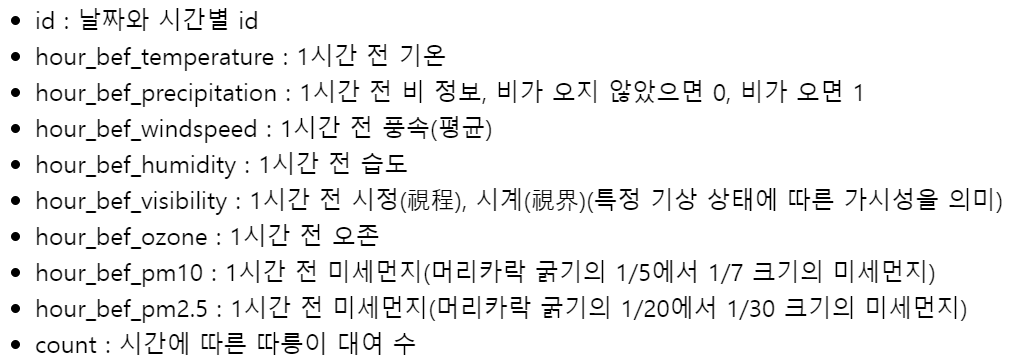

In [ ]:
test.head(2)

In [ ]:
test.tail(2)

In [ ]:
submission.head(2)

- shape

In [ ]:
train.shape

In [ ]:
test.shape

예측하고자 하는 count 항목이 비어 있는 상태로 train보다 test가 columns 수가 1개 적다

In [ ]:
submission.shape

⛔ 함수에서 ()를 사용하는 유무의 차이는 무엇일까?

- describe 기술통계량
연속형 데이터를 **의미 있는 수치**로 요약하여 데이터의 전반적인 특성을 파악

In [ ]:
train.describe()

In [ ]:
test.describe()

- group by 집단별

In [ ]:
train[['hour', 'count']].groupby('hour').mean()

In [ ]:
train['hour'].head()

In [ ]:
# 보고자하는 컬럼만 추출하여 보기
train[['hour', 'count']].head()

- plot

|색|약자|마커|의미|선|의미|
|---|---|---|---|---|---|
|blue|b|.|점|-|실선|
|green|g|o|원|--|끊어진 실선|
|red|r|v|역삼각형|-.|점+실선|
|cayn|c|^|삼각형|:|점선|
|magenta|m|s|사각형|
|yellow|y|*|별|
|black|k|x|엑스|
|white|w|d|다이아몬드|

In [ ]:
# 시간대(hour)별 따릉이 대여수(count) 산점도
plt.plot('hour', 'count', '*', data = train)

In [ ]:
train.columns

In [ ]:
# 시간대별 습도 산점도
plt.plot('hour', 'hour_bef_humidity', 'yo', data = train)

In [ ]:
# 시간대별 따릉이 이용수 및 1시간전 시정/시계 산점도
plt.plot('hour', 'count', 'r+', data=train)
plt.plot('hour', 'hour_bef_visibility', 'c^', data=train)

In [ ]:
# 따릉이 이용건 수 중에서 출근 시간 이용량 확인
plt.title('Plot 1', fontsize = 15)  # 그래프 제목 설정
plt.plot('hour', 'count', 'o', data = train)
plt.xlabel('hour', fontsize=12)     # x축 읾 설정
plt.ylabel('count', fontsize = 12)  # y축 이름 설정
plt.axvline(8, color = 'red')       # 축을 가로지르는 세로 선 생성
plt.text(3, 200, 'go to work', fontsize =10)    # 원하는 위치에 텍스트 생성
plt.savefig('plt1.png')

- 상관계수

In [ ]:
train.corr()

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(train.corr(), annot=True)

In [ ]:
sns.lmplot(x='hour', y='count', data=train)

Scatter plot with regression line([link](https://kimdingko-world.tistory.com/170))
- `lmplot()`
   - 주어진 데이터로 산점도럴 FacetGrid에 생성
      + FacetGrid 클래스 : 여러 플롯에 대한 그리드를 생성하여 데이터의 다른 하위 집합과 데이터 분포 간의 관계를 시각화하는 데 사용됩니다. 
   - parameter(매개변수) `hue` 와 `col` parameters를 사용하여 그래프를 그림
      - hue : 새로운 변수를 다른 색상을 이용하여 추가하는 파라미터 
      - col : 별도의 새로운 plot으로 분할하는 데 사용되는 파라미터

In [ ]:
train['count'].plot(kind = 'hist', bins=30)

In [ ]:
sns.kdeplot(train['count'])

- 커널 밀도 추정을 사용하여 일변량 또는 이변량 분포를 플로팅

In [ ]:
sns.boxplot(x='hour', y = 'hour_bef_humidity', data = train)

In [ ]:
sns.pairplot(train[['hour', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

In [ ]:
sns.jointplot('hour','count', data=train, alpha=0.1)

- 이변량 및 일변량 그래프를 사용하여 두 변수의 플롯 생성

In [ ]:
sns.violinplot(x = 'hour', y='hour_bef_humidity', data=train)

시간대별 습도 분포를 그려주었다. 새벽 4-6시 쯤 습도 범위가 가장 넓다는 것을 보였다.

- `sns.violineplot` : 상자 그림과 커널 밀도 추정값의 조합을 그립니다.

In [ ]:
train[train['hour']>12]

In [ ]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size='count', data = train[train['hour'] > 12])

12시 이후의 습도 대비 '비가 왔는지'를 확인하고 따릉이 사용 빈도를 그룹화하여 산전도로 보여주었다.

- `sns.relplot()` : FacetGrid에 관계형 플롯을 그리기 위한 Figure-level interface
   * `hue` : 그룹화 변수 ⇨ 다른 범주일 경우 생상 매핑이 다르게 작동
   * `size` : 크기가 다른 요소들을 그룹화 변수
- FacetGrid클래스 란?
   * 여러 플롯에 대한 그리드를 생성하여 데이